**Metadata**

**Topic**
* Building a spaCy processing pipeline
* Analyzing customer feedback using spaCy

**Target number of turns:** 2 (User + assistant)

**Suggested conversation:** When the user asks for building a spaCy processing pipeline, the assistant provides it and if the user wants to perform sentiment analysis for the feedback, they can provide the feedback csv data and the assistant provides the sentiment polarity and the sentiment subjectivity

#Building a spaCy processing pipeline
**Description**
Building a simple spaCy processing pipeline by importing the necessary libraries, loading the english model for spaCy ***(en_core_web_sm)*** and processing the pipeline.

**The pipeline processings carried out are**
* Tokenization
* Named Entity Recognition
* Dependency Parsing
* Parts of speech tagging


In [11]:
#importing the necessary libraries
import spacy
from spacy import displacy

In [2]:
#NLP model that gets the language model
nlp=spacy.load("en_core_web_sm")

In [3]:
#creating a nlp object
doc=nlp("This is an example sentence")

In [4]:
#accessing the tokens in the processed document
for token in doc:
  print(token.text,token.pos_,token.dep_)

This PRON nsubj
is AUX ROOT
an DET det
example NOUN compound
sentence NOUN attr


##Tokenisation using spaCy

In [5]:
#accessing the tokens in a document
text="I am Keerthana"
d=nlp(text)
for token in d:
  print(token.text)

I
am
Keerthana


##NER using spaCy

In [10]:
#performing named entity recognition
text=("Turing is situated in Palo, California and the CEO of the company is Jonathan Siddharth,")
docner=nlp(text)
print("The entities are: ")
#extracting the named entities
entities=[(ent.text,ent.label_) for ent in docner.ents]
for entity,label in entities:
  print(f"{entity} - {label}")


The entities are: 
Palo - GPE
California - GPE
Jonathan Siddharth - PERSON


##Dependency Parsing using spaCy

In [12]:
#to analyze the structure of a sentence
input="Your products are excellent"
document=nlp(input)
#visualize the dependency parse tree
displacy.render(document,style="dep",jupyter=True,options={'distance':90})

In [15]:
displacy.render(docner,style="ent",jupyter=True,options={'distance':90})

##Parts of speech tagging using spaCy

In [18]:
text_input="Your products are excellent. Deliver it to my location Chennai"
doc_pos=nlp(text_input)
#extracting the parts of speech tags
pos_tags=[(token.text,token.pos_) for token in doc_pos]
#printing the parts of speech tag
print("Parts of speech tag")
for token,pos_tag in pos_tags:
  print(f"{token} - {pos_tag}")

Parts of speech tag
Your - PRON
products - NOUN
are - AUX
excellent - ADJ
. - PUNCT
Deliver - VERB
it - PRON
to - ADP
my - PRON
location - NOUN
Chennai - PROPN


##Analyze customer feedback using spaCy
###sentiment analysis using spaCy and TextBlob

In [1]:
#importing the required libraries
import spacy
from textblob import TextBlob
import pandas as pd
import csv
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
#load the english NLP model
nlp=spacy.load("en_core_web_sm")

#defining the path to the file containing the feedback
file_path= '/content/feedback_data.csv'

#reading the files
with open(file_path,"r",encoding="utf-8") as file:
  feedback_data=file.readlines()

#adding the output to a different file
output_csv="feedback_analysis.csv"
csv_header=["feedback index","sentiment polarity","sentiment subjectivity","named entities","preferred contact"]

with open(output_csv,"w",newline="",encoding="utf-8") as csv_file:
  csv_writer=csv.writer(csv_file)
  csv_writer.writerow(csv_header)
  #processing and analysing each feedback

  for idx,narrative in enumerate(feedback_data,start=1):
    print(f"\nProcessing feedback {idx}")
    print(narrative.strip())

    doc=nlp(narrative)
    #performing sentiment analysis using textblob
    blob=TextBlob(narrative)
    sentiment_polarity=blob.sentiment.polarity
    sentiment_subjectivity=blob.sentiment.subjectivity
    print(f"Sentiment: {sentiment_polarity}(Polarity), {sentiment_subjectivity}(subjectivity)")

    #extracting the named entities
    entities=[(ent.text,ent.label_) for ent in doc.ents]
    print("Named entities:",entities)

    #determining the preferred contact method
    preferred_contact= "chat" if "email" not in narrative.lower() else "email"
    print(f"Preferred contact method: {preferred_contact}")

    csv_writer.writerow([idx,sentiment_polarity,sentiment_subjectivity,entities,preferred_contact])


Processing feedback 1
Your products are excellent. I really love the quality! However, delivery to my location in Los Angeles was a bit slow. abbey@email.com
Sentiment: 0.44166666666666665(Polarity), 0.6666666666666666(subjectivity)
Named entities: [('Los Angeles', 'GPE')]
Preferred contact method: email

Processing feedback 2
The customer service team in New York was helpful in resolving my issue. I appreciate the assistance. brian@email.com
Sentiment: 0.13636363636363635(Polarity), 0.45454545454545453(subjectivity)
Named entities: [('New York', 'GPE')]
Preferred contact method: email

Processing feedback 3
The new features in the latest release are fantastic! They have greatly improved the user experience in San Francisco.
Sentiment: 0.48409090909090907(Polarity), 0.7511363636363636(subjectivity)
Named entities: [('San Francisco', 'GPE')]
Preferred contact method: chat

Processing feedback 4
The product didn't meet my expectations, and I'm disappointed. I hope you can address the is

##Exploratory Data Analysis on customer feedback

In [4]:
#loading the output into a pandas datatframe
df=pd.read_csv('/content/feedback_analysis.csv')
df.head()

,feedback index,sentiment polarity,sentiment subjectivity,named entities,preferred contact
0,1,0.441667,0.666667,"[('Los Angeles', 'GPE')]",email
1,2,0.136364,0.454545,"[('New York', 'GPE')]",email
2,3,0.484091,0.751136,"[('San Francisco', 'GPE')]",chat
3,4,-0.750000,0.750000,"[('Chicago', 'GPE')]",email


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   feedback index          4 non-null      int64  
 1   sentiment polarity      4 non-null      float64
 2   sentiment subjectivity  4 non-null      float64
 3   named entities          4 non-null      object 
 4   preferred contact       4 non-null      object 
dtypes: float64(2), int64(1), object(2)
memory usage: 288.0+ bytes


##Plotting the preferred contact method

<ipython-input-8-d9c0bbe2d768>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,x="preferred contact",palette="muted")


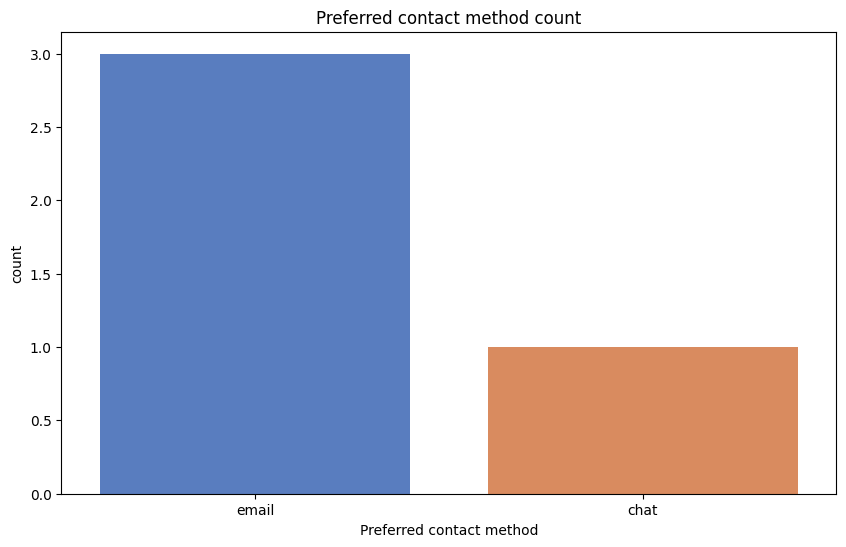

In [8]:
#plotting count plot for preferred contact method
plt.figure(figsize=(10,6))
sns.countplot(data=df,x="preferred contact",palette="muted")
plt.title("Preferred contact method count")
plt.xlabel("Preferred contact method")
plt.ylabel('count')
plt.show()

##Plotting the sentiment polarity and sentiment subjectivity

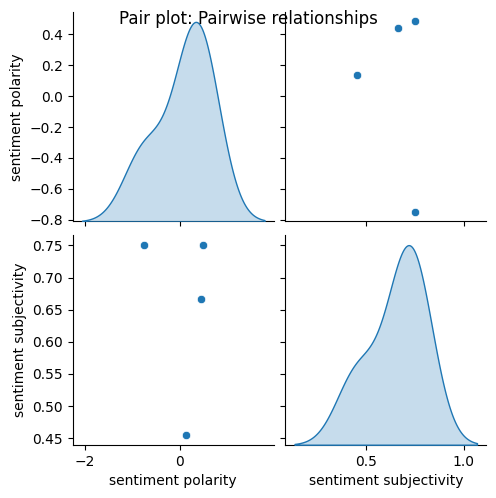

In [9]:
#plotting the pairplot for the sentiment polarity and sentiment subjectivity
sns.pairplot(data=df[['sentiment polarity','sentiment subjectivity']],
             diag_kind="kde")
plt.suptitle('Pair plot: Pairwise relationships')
plt.show()
